## 현재날짜

In [21]:
from datetime import datetime
import pandas as pd
from pandas import Series,DataFrame
datetime.now()  #튜플형식으로 출력

datetime.datetime(2022, 4, 5, 17, 58, 10, 140681)

In [22]:
d1 = datetime.now()
type(d1)

datetime.datetime

In [23]:
d1.year #연

2022

In [24]:
d1.month #월

4

In [25]:
d1.day #일

5

# 날짜 파싱

In [26]:
d2 = '2022/01/01'
d2.year

AttributeError: 'str' object has no attribute 'year'

##### datetime.strptime(date_string, format)
- 문자열을 datetime 객체로
- 벡터 연산이 안됨

In [27]:
datetime.strptime(d2, '%Y/%m/%d')

datetime.datetime(2022, 1, 1, 0, 0)

In [28]:
datetime.strptime('09/12/25','%m/%d/%y')
#2025년 09월 12일로 해석

datetime.datetime(2025, 9, 12, 0, 0)

In [29]:
#strftime : datetime 을 문자열로

##### Series는 벡터 연산이 불가능

In [31]:
s1 = Series(['2022/01/01','2022/01/02','2022/01/03'])
s1

0    2022/01/01
1    2022/01/02
2    2022/01/03
dtype: object

In [32]:
datetime.strptime(s1, '%Y/%m/%d')

TypeError: strptime() argument 1 must be str, not Series

In [33]:
#해결방법 --> map
s1.map(lambda x: datetime.strptime(x,'%Y/%m/%d'))

0   2022-01-01
1   2022-01-02
2   2022-01-03
dtype: datetime64[ns]

# pd.to_datetime
- 벡터연산 가능

In [34]:
s1

0    2022/01/01
1    2022/01/02
2    2022/01/03
dtype: object

In [35]:
s2 = pd.to_datetime(s1)
s2

0   2022-01-01
1   2022-01-02
2   2022-01-03
dtype: datetime64[ns]

In [36]:
pd.to_datetime(s2, format = '%Y/%m/%d')

0   2022-01-01
1   2022-01-02
2   2022-01-03
dtype: datetime64[ns]

In [37]:
s1
type(s1)

pandas.core.series.Series

In [38]:
s2 = pd.to_datetime(s1, infer_datetime_format=True)
s2
#infer_datetime_format=날짜or시간 포맷 추정해서 파싱하기

0   2022-01-01
1   2022-01-02
2   2022-01-03
dtype: datetime64[ns]

In [39]:
s3 = pd.DataFrame({'date' : ['01-05-21','01-06-21','01-07-21']})
print(s3.dtypes)
s3

date    object
dtype: object


,date
0,01-05-21
1,01-06-21
2,01-07-21


# 날짜 포맷 변경
- datetime.strftime(string, format time)
- 요일 추출(날짜에서 요일을 return 하도록 날짜 출력 형식 변경)
- (연/월/일) --> (월/일/연) 순서로 변경
- (주의) 날짜 포맷 변경 한 후 return 데이터 타입은 무조건 문자

In [40]:
d1 = datetime.now()
d1

datetime.datetime(2022, 4, 5, 18, 3, 11, 677005)

In [41]:
type(d1)

datetime.datetime

In [42]:
datetime.strftime(d1, '%a') #요일 리턴(축약형)

'Tue'

In [43]:
datetime.strftime(d1, '%A') #요일 리턴(완전체)

'Tuesday'

In [44]:
datetime.strftime(d1, '%m-%d,%Y') #한계: 데이터타입이 아닌 문자로 출력됨

'04-05,2022'

In [45]:
datetime.strftime(d1, '%Y')  #연도 리턴(완전체) 

'2022'

In [47]:
a = datetime.strftime(d1, '%y')  #연도 리턴(축약형) 
type(a)

str

In [48]:
datetime.strftime(s2, '%Y')
##Series는 벡터 연산불가능

TypeError: descriptor 'strftime' for 'datetime.date' objects doesn't apply to a 'Series' object

In [49]:
s2.map(lambda x: datetime.strftime(x, '%Y'))

0    2022
1    2022
2    2022
dtype: object

# 날짜 연산

- 오늘 날짜로부터 100일 뒤의 날짜 리턴

In [50]:
d1+100 #불가능(정수,datetime계산불가)

TypeError: unsupported operand type(s) for +: 'datetime.datetime' and 'int'

##### 1. offset
- 일반적으로 동일 오브젝트 안에서 처음부터 주어진 요소나 지점까지의 변위차를 나타내는 정수형

In [51]:
from pandas.tseries.offsets import Day, Hour, Second
d1 + Day(100)

Timestamp('2022-07-14 18:03:11.677005')

##### 2. timedelta (날짜와의 차이)

In [52]:
from datetime import timedelta
d1 + timedelta(100)

datetime.datetime(2022, 7, 14, 18, 3, 11, 677005)

##### 3. DateOffset 

In [53]:
d1 + pd.DateOffset(months = 4)

Timestamp('2022-08-05 18:03:11.677005')

- 날짜-날짜

In [54]:
d1 - datetime.strptime(d2, '%Y/%m/%d')

datetime.timedelta(days=94, seconds=64991, microseconds=677005)

In [55]:
d3 = d1 - datetime.strptime(d2, '%Y/%m/%d')
d3.days

94

In [56]:
d3.seconds

64991

# (예제) 요일별 통화 건 수 총합

In [59]:
deli = pd.read_csv('C:/Users/ZenBook/Desktop/냇물이/교육/code/data/delivery.csv')
deli

,일자,시간대,업종,시도,시군구,읍면동,통화건수
0,20180201,0,음식점-족발/보쌈전문,서울특별시,강남구,논현동,5
1,20180201,0,음식점-족발/보쌈전문,서울특별시,강남구,역삼동,5
2,20180201,0,음식점-족발/보쌈전문,서울특별시,강서구,내발산동,5
3,20180201,0,음식점-족발/보쌈전문,서울특별시,강서구,화곡동,5
4,20180201,0,음식점-족발/보쌈전문,서울특별시,동작구,신대방동,5
...,...,...,...,...,...,...,...
119184,20180228,23,피자,서울특별시,서대문구,북가좌동,5
119185,20180228,23,피자,서울특별시,중랑구,망우동,5
119186,20180228,23,피자,서울특별시,중랑구,면목동,5
119187,20180228,23,피자,서울특별시,양천구,신정동,5


In [60]:
deli.dtypes

일자       int64
시간대      int64
업종      object
시도      object
시군구     object
읍면동     object
통화건수     int64
dtype: object

In [61]:
type(deli)

pandas.core.frame.DataFrame

In [62]:
deli.head()

,일자,시간대,업종,시도,시군구,읍면동,통화건수
0,20180201,0,음식점-족발/보쌈전문,서울특별시,강남구,논현동,5
1,20180201,0,음식점-족발/보쌈전문,서울특별시,강남구,역삼동,5
2,20180201,0,음식점-족발/보쌈전문,서울특별시,강서구,내발산동,5
3,20180201,0,음식점-족발/보쌈전문,서울특별시,강서구,화곡동,5
4,20180201,0,음식점-족발/보쌈전문,서울특별시,동작구,신대방동,5


In [63]:
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119189 entries, 0 to 119188
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   일자      119189 non-null  int64 
 1   시간대     119189 non-null  int64 
 2   업종      119189 non-null  object
 3   시도      119189 non-null  object
 4   시군구     119189 non-null  object
 5   읍면동     119189 non-null  object
 6   통화건수    119189 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 6.4+ MB


In [64]:
deli.describe()

,일자,시간대,통화건수
count,1.191890e+05,119189.000000,119189.000000
mean,2.018021e+07,15.576362,9.916486
std,8.234111e+00,5.321848,13.904536
min,2.018020e+07,0.000000,5.000000
25%,2.018021e+07,13.000000,5.000000
50%,2.018021e+07,17.000000,5.000000
75%,2.018022e+07,19.000000,7.000000
max,2.018023e+07,23.000000,229.000000


<AxesSubplot:>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53685 missing from c

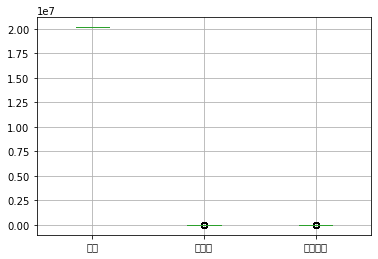

In [65]:
deli.boxplot()

### 날짜 파싱

In [66]:
deli['일자']

0         20180201
1         20180201
2         20180201
3         20180201
4         20180201
            ...   
119184    20180228
119185    20180228
119186    20180228
119187    20180228
119188    20180228
Name: 일자, Length: 119189, dtype: int64

In [67]:
type(deli['일자'])

pandas.core.series.Series

In [68]:
deli['일자'] = pd.to_datetime(deli['일자'],infer_datetime_format=True, format = '%Y%m%d')

### 요일 리턴

In [69]:
datetime.strftime(deli['일자'],'%A') #Series

TypeError: descriptor 'strftime' for 'datetime.date' objects doesn't apply to a 'Series' object

In [70]:
deli['일자'].map(lambda x: datetime.strftime(x,'%A'))

0          Thursday
1          Thursday
2          Thursday
3          Thursday
4          Thursday
            ...    
119184    Wednesday
119185    Wednesday
119186    Wednesday
119187    Wednesday
119188    Wednesday
Name: 일자, Length: 119189, dtype: object

In [71]:
deli['요일'] = deli['일자'].map(lambda x: datetime.strftime(x,'%A'))

### 요일별로 그룹화(통화건수)

In [73]:
deli.groupby(by = ['요일'])['통화건수'].sum()

요일
Friday       162037
Monday       142157
Saturday     196429
Sunday       196096
Thursday     150316
Tuesday      158544
Wednesday    176357
Name: 통화건수, dtype: int64

In [74]:
total = deli.groupby('요일')['통화건수'].sum()

In [75]:
total[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
#월화수목금토일 순으로 하기 위해 sort를 해도 알파벳순이라 적용이 x, 색인으로 처리해야 함

요일
Monday       142157
Tuesday      158544
Wednesday    176357
Thursday     150316
Friday       162037
Saturday     196429
Sunday       196096
Name: 통화건수, dtype: int64

### 일자별 통화건수

In [76]:
deli.groupby('일자')['통화건수'].sum()

일자
2018-02-01    39653
2018-02-02    46081
2018-02-03    54124
2018-02-04    50323
2018-02-05    35023
2018-02-06    38628
2018-02-07    39371
2018-02-08    40153
2018-02-09    49116
2018-02-10    54101
2018-02-11    50795
2018-02-12    36734
2018-02-13    43097
2018-02-14    45282
2018-02-15    28201
2018-02-16    16570
2018-02-17    34789
2018-02-18    43692
2018-02-19    34259
2018-02-20    38036
2018-02-21    39381
2018-02-22    42309
2018-02-23    50270
2018-02-24    53415
2018-02-25    51286
2018-02-26    36141
2018-02-27    38783
2018-02-28    52323
Name: 통화건수, dtype: int64